In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.deep_svdd import DeepSVDD

normal_path = "features/S01/1/Normal/c_data"
relay_path  = "features/S01/1/Relay/c_data"

with h5py.File("datasets/features_S01_combined.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49997, n_norm))
    dataset_relay  = np.zeros((49998, n_relay))

    for i in range(49997):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49998):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

Epoch 1/100, Loss: 965.4022237658501
Epoch 2/100, Loss: 965.3560367822647
Epoch 3/100, Loss: 965.4227474033833
Epoch 4/100, Loss: 965.7683498263359
Epoch 5/100, Loss: 965.3348751366138
Epoch 6/100, Loss: 965.338051199913
Epoch 7/100, Loss: 965.2528990507126
Epoch 8/100, Loss: 965.3706586658955
Epoch 9/100, Loss: 965.4771248996258
Epoch 10/100, Loss: 965.3650779724121
Epoch 11/100, Loss: 965.7058393955231
Epoch 12/100, Loss: 965.4643434286118
Epoch 13/100, Loss: 965.4756399691105
Epoch 14/100, Loss: 965.3772115409374
Epoch 15/100, Loss: 965.4877497851849
Epoch 16/100, Loss: 965.358276963234
Epoch 17/100, Loss: 965.4801017940044
Epoch 18/100, Loss: 965.4608361124992
Epoch 19/100, Loss: 965.3340402245522
Epoch 20/100, Loss: 965.3845739662647
Epoch 21/100, Loss: 965.3103477358818
Epoch 22/100, Loss: 965.3696865439415
Epoch 23/100, Loss: 965.9749227762222
Epoch 24/100, Loss: 965.5638265311718
Epoch 25/100, Loss: 965.3660871982574
Epoch 26/100, Loss: 965.2622209787369
Epoch 27/100, Loss: 965

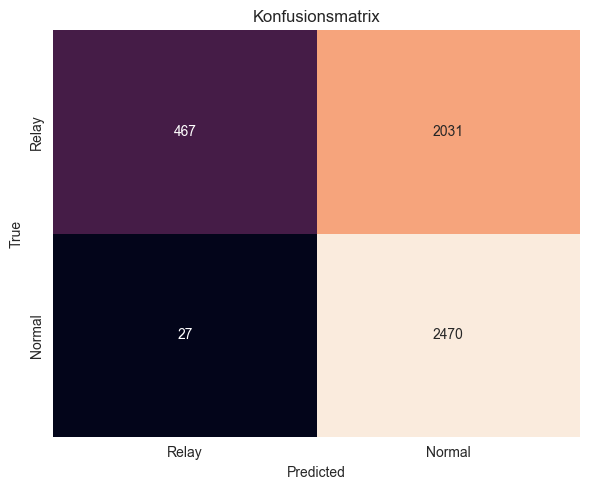

Epoch 1/100, Loss: 1117.4614773392677
Epoch 2/100, Loss: 1117.5239952206612
Epoch 3/100, Loss: 1117.2765190005302
Epoch 4/100, Loss: 1117.2116432189941
Epoch 5/100, Loss: 1117.4862670004368
Epoch 6/100, Loss: 1117.1255468130112
Epoch 7/100, Loss: 1117.253457725048
Epoch 8/100, Loss: 1117.2944662570953
Epoch 9/100, Loss: 1117.2478599250317
Epoch 10/100, Loss: 1117.1581684947014
Epoch 11/100, Loss: 1117.1476847231388
Epoch 12/100, Loss: 1117.290736734867
Epoch 13/100, Loss: 1117.3594686985016
Epoch 14/100, Loss: 1117.323520898819
Epoch 15/100, Loss: 1117.4171456098557
Epoch 16/100, Loss: 1117.3899840414524
Epoch 17/100, Loss: 1117.3416945040226
Epoch 18/100, Loss: 1117.154542595148
Epoch 19/100, Loss: 1117.2366608977318
Epoch 20/100, Loss: 1117.1521614789963
Epoch 21/100, Loss: 1117.3012137115002
Epoch 22/100, Loss: 1117.2514667212963
Epoch 23/100, Loss: 1117.4169644117355
Epoch 24/100, Loss: 1117.1000217795372
Epoch 25/100, Loss: 1117.5044448077679
Epoch 26/100, Loss: 1117.233051508665


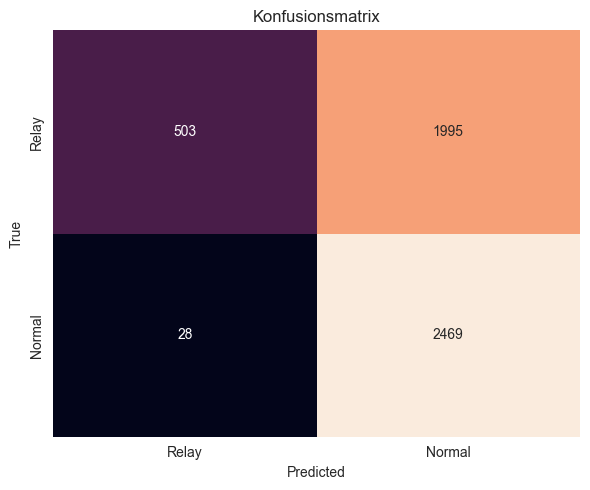

Epoch 1/100, Loss: 1204.0720058381557
Epoch 2/100, Loss: 1203.8170478343964
Epoch 3/100, Loss: 1204.0500987768173
Epoch 4/100, Loss: 1203.9306246638298
Epoch 5/100, Loss: 1203.7102760374546
Epoch 6/100, Loss: 1203.9884096980095
Epoch 7/100, Loss: 1203.8767017126083
Epoch 8/100, Loss: 1203.9657116532326
Epoch 9/100, Loss: 1203.8751959502697
Epoch 10/100, Loss: 1203.9416582286358
Epoch 11/100, Loss: 1203.9847462773323
Epoch 12/100, Loss: 1203.8915927112103
Epoch 13/100, Loss: 1203.8150499463081
Epoch 14/100, Loss: 1204.0516719818115
Epoch 15/100, Loss: 1203.8719404935837
Epoch 16/100, Loss: 1203.9108562469482
Epoch 17/100, Loss: 1203.8556939065456
Epoch 18/100, Loss: 1203.9659653902054
Epoch 19/100, Loss: 1203.9554629027843
Epoch 20/100, Loss: 1203.8005311489105
Epoch 21/100, Loss: 1203.8879967033863
Epoch 22/100, Loss: 1203.9072058200836
Epoch 23/100, Loss: 1204.1264688968658
Epoch 24/100, Loss: 1204.0257389843464
Epoch 25/100, Loss: 1204.2762822508812
Epoch 26/100, Loss: 1203.836011707

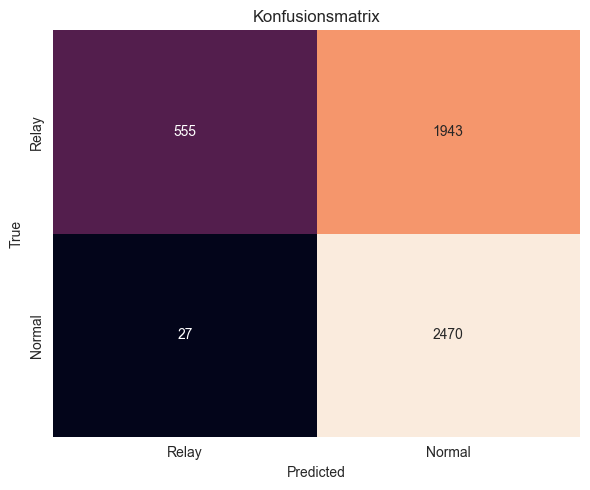

Epoch 1/100, Loss: 2019.410453736782
Epoch 2/100, Loss: 2019.4316914081573
Epoch 3/100, Loss: 2019.2733545303345
Epoch 4/100, Loss: 2019.104886174202
Epoch 5/100, Loss: 2019.3479403853416
Epoch 6/100, Loss: 2019.6222269535065
Epoch 7/100, Loss: 2019.696347117424
Epoch 8/100, Loss: 2019.5529990196228
Epoch 9/100, Loss: 2019.559405207634
Epoch 10/100, Loss: 2019.448799610138
Epoch 11/100, Loss: 2019.2253046035767
Epoch 12/100, Loss: 2019.5612841844559
Epoch 13/100, Loss: 2019.4418411254883
Epoch 14/100, Loss: 2019.222117781639
Epoch 15/100, Loss: 2019.5138148069382
Epoch 16/100, Loss: 2019.3482993841171
Epoch 17/100, Loss: 2019.3740122914314
Epoch 18/100, Loss: 2019.4338009953499
Epoch 19/100, Loss: 2019.5491532683372
Epoch 20/100, Loss: 2019.4428244829178
Epoch 21/100, Loss: 2019.3420252203941
Epoch 22/100, Loss: 2019.3003593683243
Epoch 23/100, Loss: 2019.6797310709953
Epoch 24/100, Loss: 2019.2316408753395
Epoch 25/100, Loss: 2019.4092010855675
Epoch 26/100, Loss: 2019.6167896986008
E

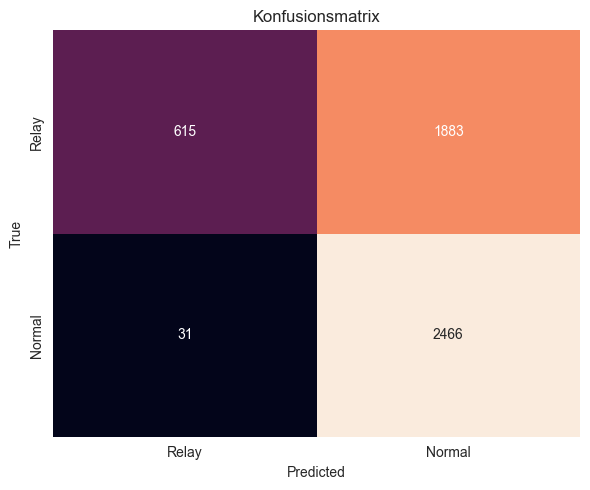

Epoch 1/100, Loss: 2428.21420276165
Epoch 2/100, Loss: 2428.2322092056274
Epoch 3/100, Loss: 2428.026966571808
Epoch 4/100, Loss: 2429.1539390087128
Epoch 5/100, Loss: 2428.069234907627
Epoch 6/100, Loss: 2428.31782746315
Epoch 7/100, Loss: 2427.962236404419
Epoch 8/100, Loss: 2428.196333885193
Epoch 9/100, Loss: 2428.4196229577065
Epoch 10/100, Loss: 2428.023720741272
Epoch 11/100, Loss: 2428.849136710167
Epoch 12/100, Loss: 2428.3301634788513
Epoch 13/100, Loss: 2428.440022945404
Epoch 14/100, Loss: 2428.170857191086
Epoch 15/100, Loss: 2428.2677377462387
Epoch 16/100, Loss: 2428.6043425798416
Epoch 17/100, Loss: 2428.290456354618
Epoch 18/100, Loss: 2428.069697856903
Epoch 19/100, Loss: 2428.641526222229
Epoch 20/100, Loss: 2428.048002243042
Epoch 21/100, Loss: 2427.9162801504135
Epoch 22/100, Loss: 2428.102151989937
Epoch 23/100, Loss: 2428.112105846405
Epoch 24/100, Loss: 2428.1342562437057
Epoch 25/100, Loss: 2428.227140188217
Epoch 26/100, Loss: 2428.3594633340836
Epoch 27/100, 

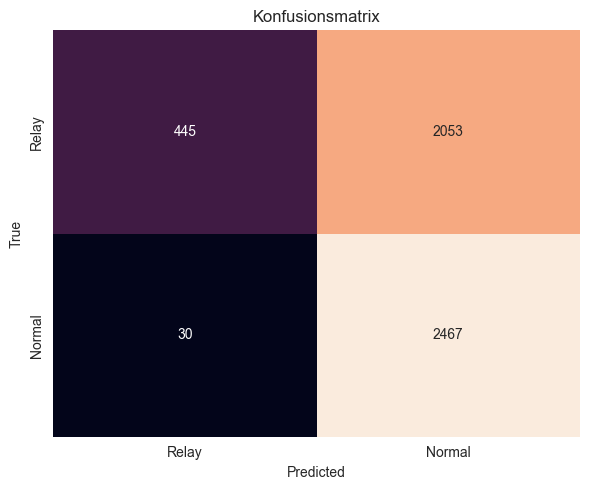

Epoch 1/100, Loss: 3033.558840751648
Epoch 2/100, Loss: 3032.9060977697372
Epoch 3/100, Loss: 3032.4687085151672
Epoch 4/100, Loss: 3033.325296163559
Epoch 5/100, Loss: 3033.1341520547867
Epoch 6/100, Loss: 3033.131764769554
Epoch 7/100, Loss: 3032.8824611902237
Epoch 8/100, Loss: 3033.0010299682617
Epoch 9/100, Loss: 3033.0836189985275
Epoch 10/100, Loss: 3032.9075968265533
Epoch 11/100, Loss: 3033.0448850393295
Epoch 12/100, Loss: 3033.4347373247147
Epoch 13/100, Loss: 3032.8230016231537
Epoch 14/100, Loss: 3033.6386964321136
Epoch 15/100, Loss: 3032.5501242876053
Epoch 16/100, Loss: 3032.5373928546906
Epoch 17/100, Loss: 3032.8201916217804
Epoch 18/100, Loss: 3032.6081584692
Epoch 19/100, Loss: 3033.047107577324
Epoch 20/100, Loss: 3033.847640991211
Epoch 21/100, Loss: 3032.902215361595
Epoch 22/100, Loss: 3032.9299842119217
Epoch 23/100, Loss: 3033.038178563118
Epoch 24/100, Loss: 3032.9085760116577
Epoch 25/100, Loss: 3032.9016333818436
Epoch 26/100, Loss: 3032.854674577713
Epoch 

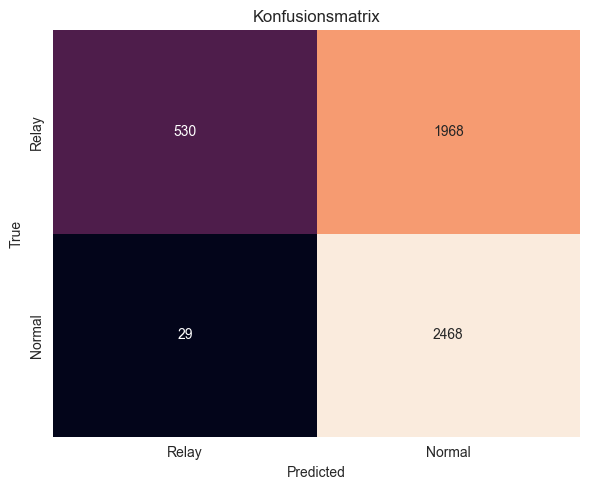

Epoch 1/100, Loss: 5383.305540084839
Epoch 2/100, Loss: 5383.422444105148
Epoch 3/100, Loss: 5383.492796421051
Epoch 4/100, Loss: 5383.346300125122
Epoch 5/100, Loss: 5383.851502418518
Epoch 6/100, Loss: 5383.507801294327
Epoch 7/100, Loss: 5384.974123716354
Epoch 8/100, Loss: 5384.632309913635
Epoch 9/100, Loss: 5383.82089138031
Epoch 10/100, Loss: 5383.643652915955
Epoch 11/100, Loss: 5383.9124751091
Epoch 12/100, Loss: 5383.993278503418
Epoch 13/100, Loss: 5384.038601636887
Epoch 14/100, Loss: 5383.905792474747
Epoch 15/100, Loss: 5383.498994350433
Epoch 16/100, Loss: 5383.558501958847
Epoch 17/100, Loss: 5383.712433099747
Epoch 18/100, Loss: 5383.79972910881
Epoch 19/100, Loss: 5383.716639041901
Epoch 20/100, Loss: 5383.697911262512
Epoch 21/100, Loss: 5384.615574359894
Epoch 22/100, Loss: 5383.821506261826
Epoch 23/100, Loss: 5384.099491357803
Epoch 24/100, Loss: 5383.963370800018
Epoch 25/100, Loss: 5383.654149532318
Epoch 26/100, Loss: 5383.50101184845
Epoch 27/100, Loss: 5383.2

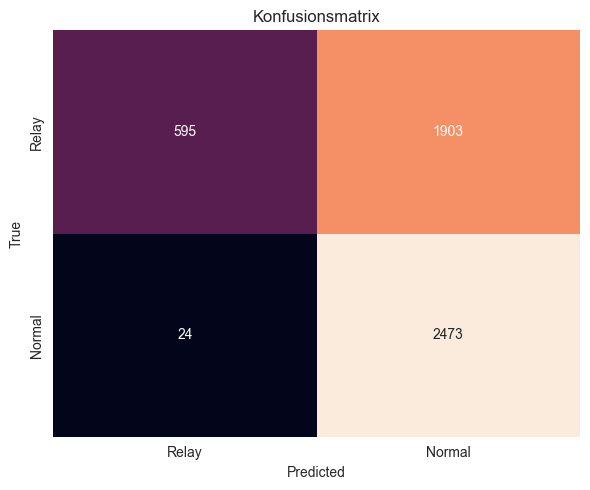

Epoch 1/100, Loss: 4137.608930706978
Epoch 2/100, Loss: 4136.792084813118
Epoch 3/100, Loss: 4137.135738968849
Epoch 4/100, Loss: 4136.936987519264
Epoch 5/100, Loss: 4137.208416581154
Epoch 6/100, Loss: 4138.1657865047455
Epoch 7/100, Loss: 4137.190936803818
Epoch 8/100, Loss: 4137.078637242317
Epoch 9/100, Loss: 4137.15108704567
Epoch 10/100, Loss: 4136.778080224991
Epoch 11/100, Loss: 4137.947666168213
Epoch 12/100, Loss: 4137.470393061638
Epoch 13/100, Loss: 4137.339170694351
Epoch 14/100, Loss: 4137.502114772797
Epoch 15/100, Loss: 4136.7101418972015
Epoch 16/100, Loss: 4136.74927008152
Epoch 17/100, Loss: 4137.470471382141
Epoch 18/100, Loss: 4137.715007662773
Epoch 19/100, Loss: 4137.291662573814
Epoch 20/100, Loss: 4136.829404115677
Epoch 21/100, Loss: 4137.731195688248
Epoch 22/100, Loss: 4136.854016304016
Epoch 23/100, Loss: 4137.071870326996
Epoch 24/100, Loss: 4137.268566250801
Epoch 25/100, Loss: 4138.161927103996
Epoch 26/100, Loss: 4137.3670119047165
Epoch 27/100, Loss: 

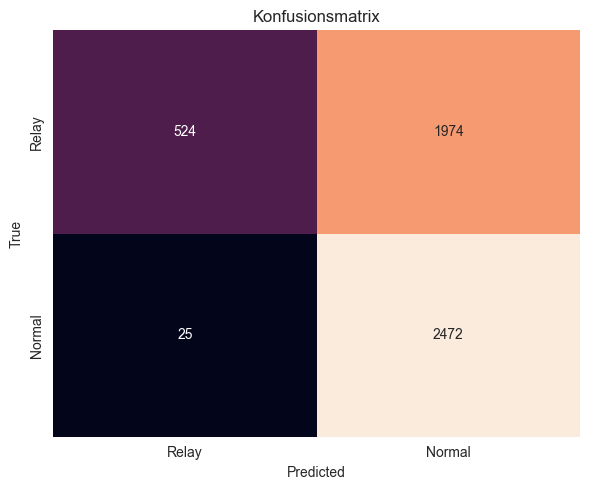

Epoch 1/100, Loss: 4833.20228266716
Epoch 2/100, Loss: 4832.681261539459
Epoch 3/100, Loss: 4832.335693836212
Epoch 4/100, Loss: 4832.490157842636
Epoch 5/100, Loss: 4832.294812917709
Epoch 6/100, Loss: 4833.513426780701
Epoch 7/100, Loss: 4833.007168054581
Epoch 8/100, Loss: 4832.644220352173
Epoch 9/100, Loss: 4832.930660486221
Epoch 10/100, Loss: 4832.320639848709
Epoch 11/100, Loss: 4832.728954315186
Epoch 12/100, Loss: 4833.06233215332
Epoch 13/100, Loss: 4832.807735681534
Epoch 14/100, Loss: 4832.453329801559
Epoch 15/100, Loss: 4833.33465719223
Epoch 16/100, Loss: 4833.317880630493
Epoch 17/100, Loss: 4833.553604602814
Epoch 18/100, Loss: 4832.963808774948
Epoch 19/100, Loss: 4832.971461057663
Epoch 20/100, Loss: 4832.756539106369
Epoch 21/100, Loss: 4833.075598478317
Epoch 22/100, Loss: 4832.555933237076
Epoch 23/100, Loss: 4832.6132390499115
Epoch 24/100, Loss: 4832.869472503662
Epoch 25/100, Loss: 4833.224397182465
Epoch 26/100, Loss: 4832.748397111893
Epoch 27/100, Loss: 483

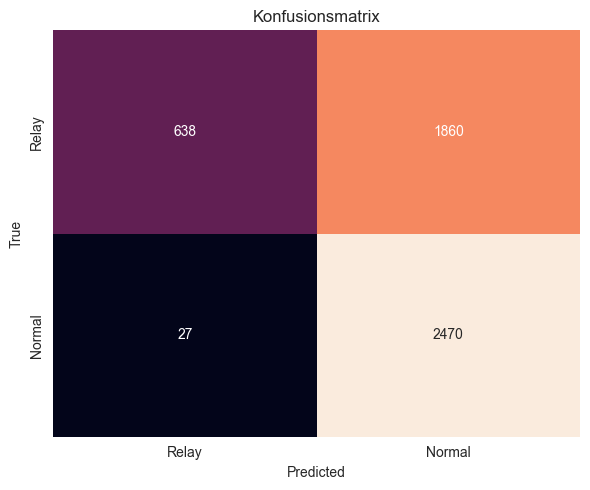

In [2]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.01, 0.1, 0.2}:
            clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=173)
            clf.fit(X_train)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neuron {n}")
            print(f"dropout {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

Epoch 1/100, Loss: 1231.2761506438255
Epoch 2/100, Loss: 1231.1647645831108
Epoch 3/100, Loss: 1231.1026655435562
Epoch 4/100, Loss: 1230.9867568016052
Epoch 5/100, Loss: 1231.1249133944511
Epoch 6/100, Loss: 1231.236085653305
Epoch 7/100, Loss: 1231.0389342308044
Epoch 8/100, Loss: 1231.4577701687813
Epoch 9/100, Loss: 1231.4211571216583
Epoch 10/100, Loss: 1231.1929679512978
Epoch 11/100, Loss: 1231.0700408816338
Epoch 12/100, Loss: 1231.1564288139343
Epoch 13/100, Loss: 1231.1962441205978
Epoch 14/100, Loss: 1231.230500280857
Epoch 15/100, Loss: 1231.0706152319908
Epoch 16/100, Loss: 1231.0724070072174
Epoch 17/100, Loss: 1231.094155907631
Epoch 18/100, Loss: 1231.0541539788246
Epoch 19/100, Loss: 1231.1763295531273
Epoch 20/100, Loss: 1231.1865817904472
Epoch 21/100, Loss: 1231.4664106965065
Epoch 22/100, Loss: 1231.0798674821854
Epoch 23/100, Loss: 1231.0446319580078
Epoch 24/100, Loss: 1231.1092997789383
Epoch 25/100, Loss: 1231.189538180828
Epoch 26/100, Loss: 1231.301508486271


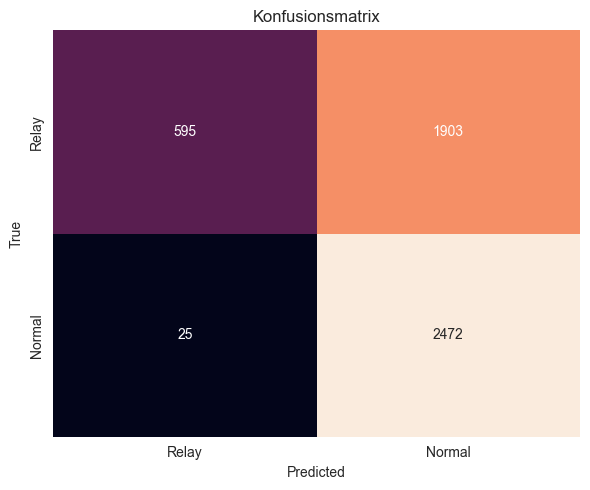

Epoch 1/100, Loss: 880.6818259060383
Epoch 2/100, Loss: 880.6437710523605
Epoch 3/100, Loss: 880.5732329189777
Epoch 4/100, Loss: 880.695564031601
Epoch 5/100, Loss: 880.5908624529839
Epoch 6/100, Loss: 880.4846679568291
Epoch 7/100, Loss: 880.532064884901
Epoch 8/100, Loss: 880.8180985152721
Epoch 9/100, Loss: 880.5934544801712
Epoch 10/100, Loss: 880.6405922174454
Epoch 11/100, Loss: 880.7499990165234
Epoch 12/100, Loss: 880.6059858798981
Epoch 13/100, Loss: 880.7799563407898
Epoch 14/100, Loss: 880.6151843369007
Epoch 15/100, Loss: 880.7771675288677
Epoch 16/100, Loss: 880.5768806040287
Epoch 17/100, Loss: 880.5172833502293
Epoch 18/100, Loss: 880.8619688749313
Epoch 19/100, Loss: 880.6391117274761
Epoch 20/100, Loss: 880.6084428727627
Epoch 21/100, Loss: 880.6456628143787
Epoch 22/100, Loss: 880.5963423848152
Epoch 23/100, Loss: 880.8058570325375
Epoch 24/100, Loss: 880.7655466496944
Epoch 25/100, Loss: 880.4916740953922
Epoch 26/100, Loss: 880.517319381237
Epoch 27/100, Loss: 880.

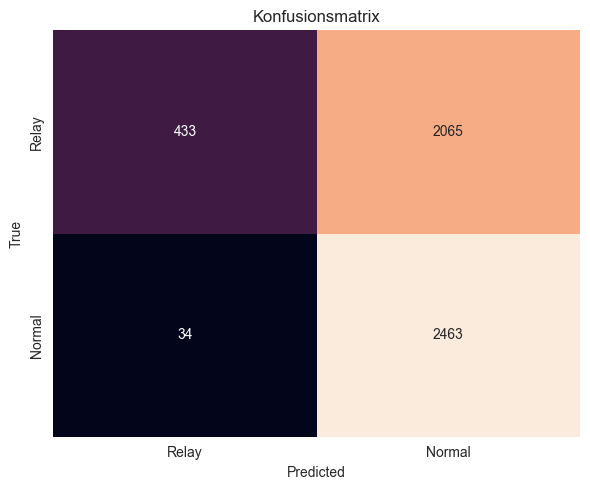

Epoch 1/100, Loss: 883.7874384522438
Epoch 2/100, Loss: 883.8184575140476
Epoch 3/100, Loss: 883.8802727460861
Epoch 4/100, Loss: 883.8635385632515
Epoch 5/100, Loss: 883.9642477929592
Epoch 6/100, Loss: 883.905492991209
Epoch 7/100, Loss: 883.8728432059288
Epoch 8/100, Loss: 883.941300213337
Epoch 9/100, Loss: 883.7977933883667
Epoch 10/100, Loss: 883.9759541451931
Epoch 11/100, Loss: 883.8843086063862
Epoch 12/100, Loss: 883.9971223175526
Epoch 13/100, Loss: 883.8812347948551
Epoch 14/100, Loss: 883.9970391988754
Epoch 15/100, Loss: 883.8543333411217
Epoch 16/100, Loss: 883.8659693598747
Epoch 17/100, Loss: 883.9024361670017
Epoch 18/100, Loss: 884.3074347376823
Epoch 19/100, Loss: 883.9136687219143
Epoch 20/100, Loss: 883.8119622170925
Epoch 21/100, Loss: 883.8607888221741
Epoch 22/100, Loss: 883.9539655447006
Epoch 23/100, Loss: 883.8946068584919
Epoch 24/100, Loss: 883.821817278862
Epoch 25/100, Loss: 883.9750654399395
Epoch 26/100, Loss: 883.8323657214642
Epoch 27/100, Loss: 883.

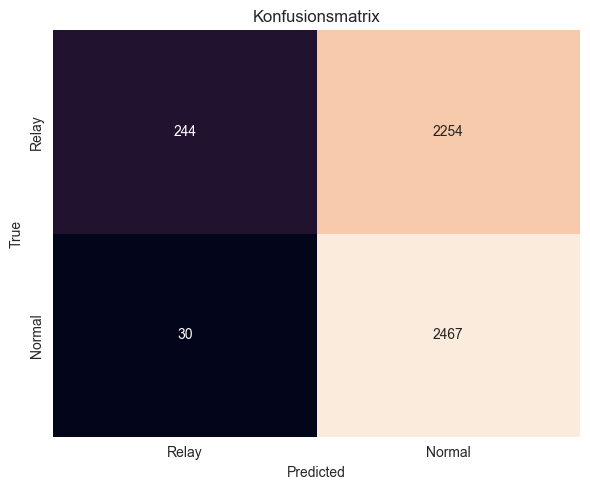

Epoch 1/100, Loss: 2474.1228576898575
Epoch 2/100, Loss: 2474.1754828691483
Epoch 3/100, Loss: 2474.0821690559387
Epoch 4/100, Loss: 2474.024810910225
Epoch 5/100, Loss: 2474.113690137863
Epoch 6/100, Loss: 2473.8827649354935
Epoch 7/100, Loss: 2474.144050836563
Epoch 8/100, Loss: 2474.4696847200394
Epoch 9/100, Loss: 2473.973099708557
Epoch 10/100, Loss: 2474.1300476789474
Epoch 11/100, Loss: 2473.8070546388626
Epoch 12/100, Loss: 2473.984433054924
Epoch 13/100, Loss: 2474.348519563675
Epoch 14/100, Loss: 2474.715532541275
Epoch 15/100, Loss: 2474.35657453537
Epoch 16/100, Loss: 2473.728695034981
Epoch 17/100, Loss: 2473.911132335663
Epoch 18/100, Loss: 2473.998741745949
Epoch 19/100, Loss: 2474.1467670202255
Epoch 20/100, Loss: 2473.9735543727875
Epoch 21/100, Loss: 2473.703367114067
Epoch 22/100, Loss: 2473.7234119176865
Epoch 23/100, Loss: 2474.2029633522034
Epoch 24/100, Loss: 2474.045167326927
Epoch 25/100, Loss: 2474.0330909490585
Epoch 26/100, Loss: 2473.7373518943787
Epoch 27/

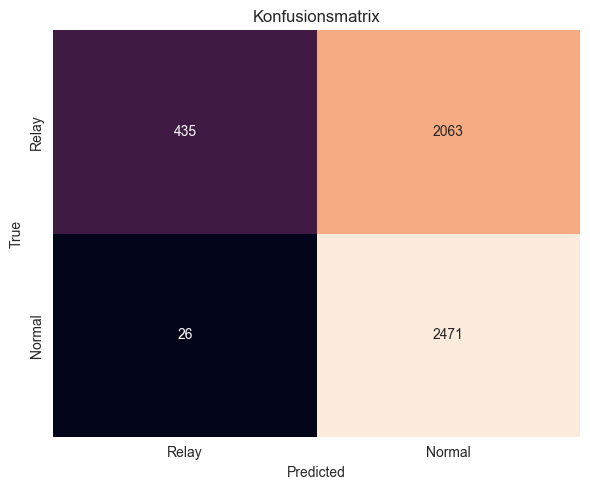

Epoch 1/100, Loss: 2859.0320051908493
Epoch 2/100, Loss: 2859.1742849349976
Epoch 3/100, Loss: 2858.7705965042114
Epoch 4/100, Loss: 2858.852769136429
Epoch 5/100, Loss: 2859.898127615452
Epoch 6/100, Loss: 2858.281166791916
Epoch 7/100, Loss: 2858.6586602926254
Epoch 8/100, Loss: 2858.9659403562546
Epoch 9/100, Loss: 2858.985578775406
Epoch 10/100, Loss: 2858.8130906820297
Epoch 11/100, Loss: 2858.736973762512
Epoch 12/100, Loss: 2858.4736655950546
Epoch 13/100, Loss: 2858.911804795265
Epoch 14/100, Loss: 2858.3662070035934
Epoch 15/100, Loss: 2858.5709565877914
Epoch 16/100, Loss: 2858.5807222127914
Epoch 17/100, Loss: 2858.820384502411
Epoch 18/100, Loss: 2858.4335947036743
Epoch 19/100, Loss: 2858.4916756153107
Epoch 20/100, Loss: 2858.5475155115128
Epoch 21/100, Loss: 2858.486748933792
Epoch 22/100, Loss: 2858.3647046089172
Epoch 23/100, Loss: 2859.1039850711823
Epoch 24/100, Loss: 2858.7059926986694
Epoch 25/100, Loss: 2858.962982416153
Epoch 26/100, Loss: 2858.5221735835075
Epoc

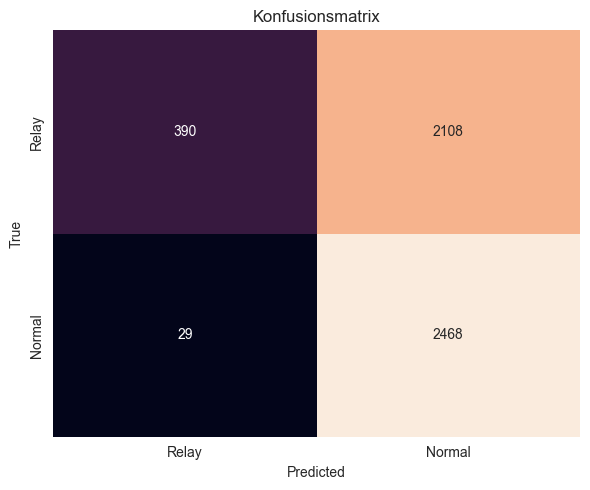

Epoch 1/100, Loss: 2701.804425239563
Epoch 2/100, Loss: 2701.9813121557236
Epoch 3/100, Loss: 2701.716972708702
Epoch 4/100, Loss: 2701.6149084568024
Epoch 5/100, Loss: 2701.8479124307632
Epoch 6/100, Loss: 2702.0083730220795
Epoch 7/100, Loss: 2701.537746191025
Epoch 8/100, Loss: 2702.208397746086
Epoch 9/100, Loss: 2702.210346341133
Epoch 10/100, Loss: 2701.9490361213684
Epoch 11/100, Loss: 2701.63365149498
Epoch 12/100, Loss: 2701.6261714696884
Epoch 13/100, Loss: 2701.789636850357
Epoch 14/100, Loss: 2701.8304674625397
Epoch 15/100, Loss: 2702.230103135109
Epoch 16/100, Loss: 2701.9303599596024
Epoch 17/100, Loss: 2702.1906884908676
Epoch 18/100, Loss: 2701.792470574379
Epoch 19/100, Loss: 2701.9180439710617
Epoch 20/100, Loss: 2701.896778702736
Epoch 21/100, Loss: 2701.747423529625
Epoch 22/100, Loss: 2701.5738917589188
Epoch 23/100, Loss: 2701.6458460092545
Epoch 24/100, Loss: 2701.6268005371094
Epoch 25/100, Loss: 2701.775194168091
Epoch 26/100, Loss: 2701.7887238264084
Epoch 27

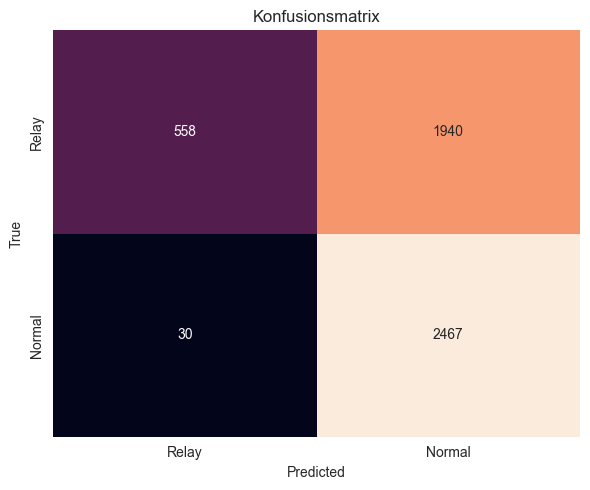

Epoch 1/100, Loss: 5821.45146894455
Epoch 2/100, Loss: 5822.2286648750305
Epoch 3/100, Loss: 5823.174603700638
Epoch 4/100, Loss: 5821.850327730179
Epoch 5/100, Loss: 5821.712205886841
Epoch 6/100, Loss: 5822.5886306762695
Epoch 7/100, Loss: 5823.289517879486
Epoch 8/100, Loss: 5822.05645275116
Epoch 9/100, Loss: 5821.564049005508
Epoch 10/100, Loss: 5821.932817697525
Epoch 11/100, Loss: 5822.9992253780365
Epoch 12/100, Loss: 5821.5806250572205
Epoch 13/100, Loss: 5823.056816339493
Epoch 14/100, Loss: 5822.927202224731
Epoch 15/100, Loss: 5821.654404401779
Epoch 16/100, Loss: 5821.924321889877
Epoch 17/100, Loss: 5821.225368022919
Epoch 18/100, Loss: 5821.978565454483
Epoch 19/100, Loss: 5821.687136173248
Epoch 20/100, Loss: 5821.958331108093
Epoch 21/100, Loss: 5821.744019985199
Epoch 22/100, Loss: 5821.972141504288
Epoch 23/100, Loss: 5822.483678817749
Epoch 24/100, Loss: 5821.847680568695
Epoch 25/100, Loss: 5821.511133670807
Epoch 26/100, Loss: 5822.653007030487
Epoch 27/100, Loss:

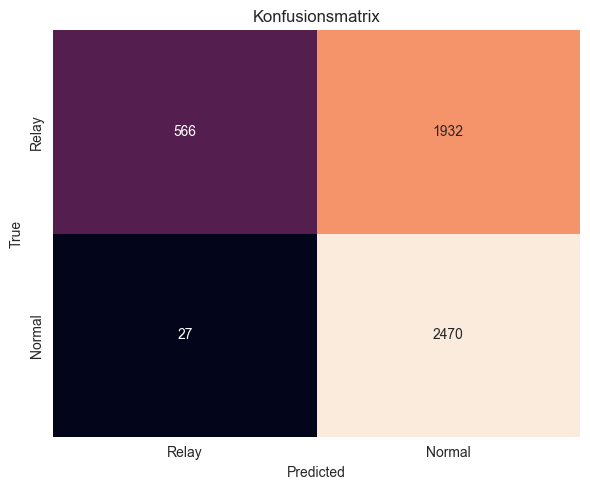

Epoch 1/100, Loss: 5028.121387720108
Epoch 2/100, Loss: 5028.496095895767
Epoch 3/100, Loss: 5028.010397672653
Epoch 4/100, Loss: 5028.644779205322
Epoch 5/100, Loss: 5028.429691791534
Epoch 6/100, Loss: 5028.4126496315
Epoch 7/100, Loss: 5028.613327741623
Epoch 8/100, Loss: 5028.191696166992
Epoch 9/100, Loss: 5028.205072402954
Epoch 10/100, Loss: 5029.020166635513
Epoch 11/100, Loss: 5028.653751850128
Epoch 12/100, Loss: 5028.3585250377655
Epoch 13/100, Loss: 5027.9476907253265
Epoch 14/100, Loss: 5028.050559282303
Epoch 15/100, Loss: 5028.357572555542
Epoch 16/100, Loss: 5028.510823011398
Epoch 17/100, Loss: 5028.397209405899
Epoch 18/100, Loss: 5028.322895288467
Epoch 19/100, Loss: 5028.040734052658
Epoch 20/100, Loss: 5028.33118391037
Epoch 21/100, Loss: 5027.915958881378
Epoch 22/100, Loss: 5028.91733455658
Epoch 23/100, Loss: 5028.341138124466
Epoch 24/100, Loss: 5028.453093767166
Epoch 25/100, Loss: 5028.440346479416
Epoch 26/100, Loss: 5028.530408620834
Epoch 27/100, Loss: 502

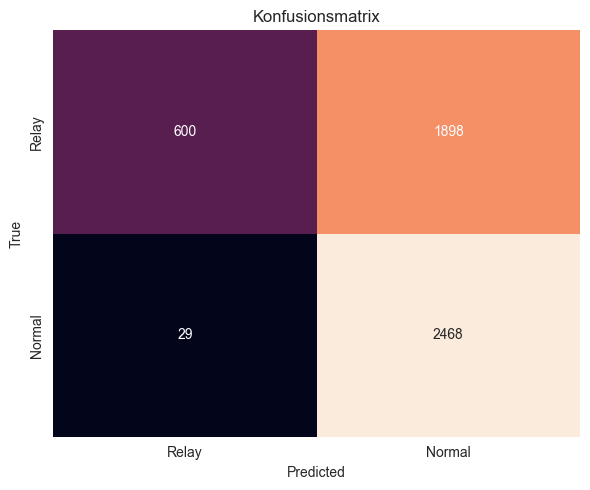

Epoch 1/100, Loss: 5884.988788366318
Epoch 2/100, Loss: 5885.212105751038
Epoch 3/100, Loss: 5885.809709072113
Epoch 4/100, Loss: 5885.395594358444
Epoch 5/100, Loss: 5885.575039625168
Epoch 6/100, Loss: 5885.362366914749
Epoch 7/100, Loss: 5886.302637338638
Epoch 8/100, Loss: 5885.825408697128
Epoch 9/100, Loss: 5887.121800661087
Epoch 10/100, Loss: 5884.660423755646
Epoch 11/100, Loss: 5885.541520118713
Epoch 12/100, Loss: 5885.874946594238
Epoch 13/100, Loss: 5885.66780424118
Epoch 14/100, Loss: 5885.289790391922
Epoch 15/100, Loss: 5885.3539316654205
Epoch 16/100, Loss: 5885.646290779114
Epoch 17/100, Loss: 5885.472609996796
Epoch 18/100, Loss: 5885.386477470398
Epoch 19/100, Loss: 5885.649791717529
Epoch 20/100, Loss: 5886.763485193253
Epoch 21/100, Loss: 5885.248825788498
Epoch 22/100, Loss: 5885.5441110134125
Epoch 23/100, Loss: 5885.476095676422
Epoch 24/100, Loss: 5886.108257770538
Epoch 25/100, Loss: 5886.080815553665
Epoch 26/100, Loss: 5885.15371465683
Epoch 27/100, Loss: 5

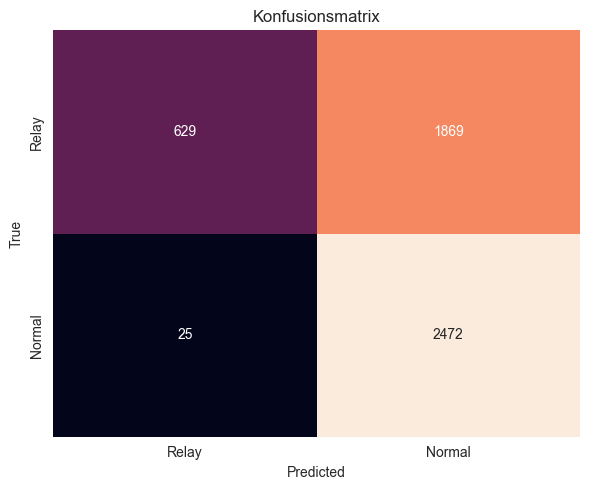

In [3]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.01, 0.1, 0.2}:
            clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=173)
            clf.fit(X_train_scaled_standard)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined_scaled_standard)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neuron {n}")
            print(f"dropout {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

Epoch 1/250, Loss: 1375.344346344471
Epoch 2/250, Loss: 1375.5560346245766
Epoch 3/250, Loss: 1375.2197812199593
Epoch 4/250, Loss: 1375.058079779148
Epoch 5/250, Loss: 1375.447693169117
Epoch 6/250, Loss: 1375.2233193516731
Epoch 7/250, Loss: 1375.4241026639938
Epoch 8/250, Loss: 1375.209309965372
Epoch 9/250, Loss: 1375.1943153738976
Epoch 10/250, Loss: 1375.414412200451
Epoch 11/250, Loss: 1375.2847738862038
Epoch 12/250, Loss: 1375.243198633194
Epoch 13/250, Loss: 1375.2226138710976
Epoch 14/250, Loss: 1375.489526629448
Epoch 15/250, Loss: 1375.1924543976784
Epoch 16/250, Loss: 1375.7930683493614
Epoch 17/250, Loss: 1375.4127570092678
Epoch 18/250, Loss: 1375.4219152927399
Epoch 19/250, Loss: 1375.6025926470757
Epoch 20/250, Loss: 1375.311697602272
Epoch 21/250, Loss: 1375.2367385029793
Epoch 22/250, Loss: 1375.2795607447624
Epoch 23/250, Loss: 1375.164979815483
Epoch 24/250, Loss: 1375.1413095593452
Epoch 25/250, Loss: 1375.834671139717
Epoch 26/250, Loss: 1375.453640460968
Epoch 

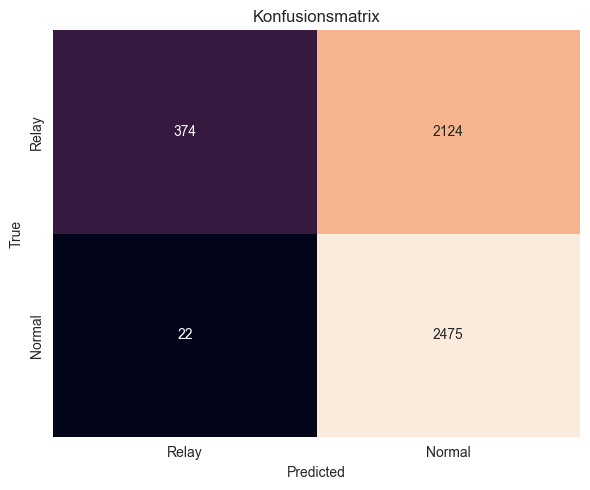

Epoch 1/250, Loss: 2148.141155600548
Epoch 2/250, Loss: 2147.926622033119
Epoch 3/250, Loss: 2147.843059897423
Epoch 4/250, Loss: 2148.005218744278
Epoch 5/250, Loss: 2147.9179030656815
Epoch 6/250, Loss: 2148.211772799492
Epoch 7/250, Loss: 2147.7912895679474
Epoch 8/250, Loss: 2147.8892075419426
Epoch 9/250, Loss: 2147.741001009941
Epoch 10/250, Loss: 2147.996864795685
Epoch 11/250, Loss: 2147.763292849064
Epoch 12/250, Loss: 2148.099815070629
Epoch 13/250, Loss: 2147.8025951981544
Epoch 14/250, Loss: 2148.174165546894
Epoch 15/250, Loss: 2147.9406844973564
Epoch 16/250, Loss: 2148.203069984913
Epoch 17/250, Loss: 2148.2880462408066
Epoch 18/250, Loss: 2148.0405950546265
Epoch 19/250, Loss: 2147.9670325517654
Epoch 20/250, Loss: 2148.184001147747
Epoch 21/250, Loss: 2147.892383337021
Epoch 22/250, Loss: 2147.8644040822983
Epoch 23/250, Loss: 2147.9130266308784
Epoch 24/250, Loss: 2148.3198454380035
Epoch 25/250, Loss: 2148.3436329960823
Epoch 26/250, Loss: 2147.889881849289
Epoch 27/

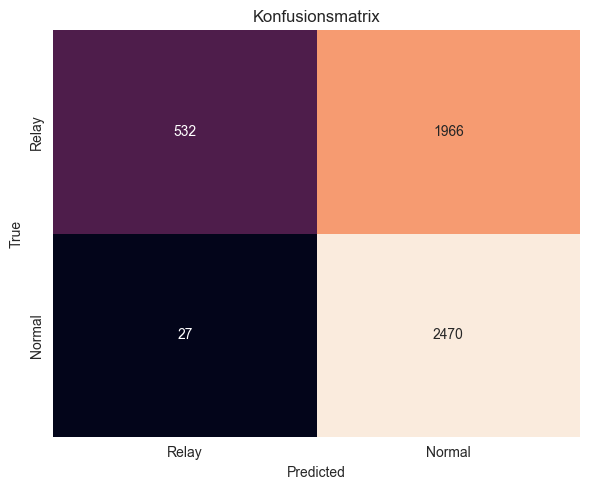

Epoch 1/250, Loss: 1298.7285273075104
Epoch 2/250, Loss: 1298.9178242087364
Epoch 3/250, Loss: 1298.6214074492455
Epoch 4/250, Loss: 1298.7137199044228
Epoch 5/250, Loss: 1298.916998386383
Epoch 6/250, Loss: 1298.7809985280037
Epoch 7/250, Loss: 1298.718842446804
Epoch 8/250, Loss: 1298.6613474488258
Epoch 9/250, Loss: 1298.812138736248
Epoch 10/250, Loss: 1298.743109881878
Epoch 11/250, Loss: 1298.7362310886383
Epoch 12/250, Loss: 1298.5834757089615
Epoch 13/250, Loss: 1298.6941862106323
Epoch 14/250, Loss: 1298.8623576760292
Epoch 15/250, Loss: 1298.6598654985428
Epoch 16/250, Loss: 1298.5816422700882
Epoch 17/250, Loss: 1298.6647404432297
Epoch 18/250, Loss: 1298.604534983635
Epoch 19/250, Loss: 1298.7406228780746
Epoch 20/250, Loss: 1298.6260919570923
Epoch 21/250, Loss: 1298.6123850941658
Epoch 22/250, Loss: 1298.6234579086304
Epoch 23/250, Loss: 1298.7287579774857
Epoch 24/250, Loss: 1298.6957767605782
Epoch 25/250, Loss: 1298.6438007354736
Epoch 26/250, Loss: 1298.8272948861122


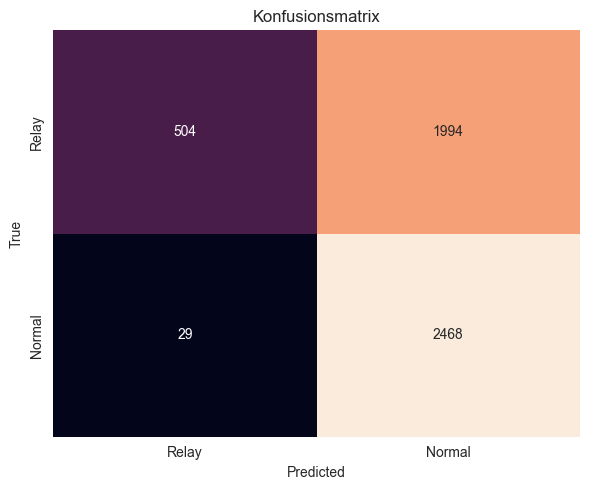

Epoch 1/250, Loss: 2010.046391069889
Epoch 2/250, Loss: 2010.2123838067055
Epoch 3/250, Loss: 2010.279018163681
Epoch 4/250, Loss: 2010.3833538889885
Epoch 5/250, Loss: 2010.134092271328
Epoch 6/250, Loss: 2010.2806190252304
Epoch 7/250, Loss: 2010.2445797920227
Epoch 8/250, Loss: 2010.2103076577187
Epoch 9/250, Loss: 2010.3871762752533
Epoch 10/250, Loss: 2010.074845790863
Epoch 11/250, Loss: 2010.3453345894814
Epoch 12/250, Loss: 2010.4183520674706
Epoch 13/250, Loss: 2010.0462875962257
Epoch 14/250, Loss: 2010.2055327296257
Epoch 15/250, Loss: 2010.847448348999
Epoch 16/250, Loss: 2010.0055019259453
Epoch 17/250, Loss: 2010.3098837137222
Epoch 18/250, Loss: 2010.2240625023842
Epoch 19/250, Loss: 2010.2627331018448
Epoch 20/250, Loss: 2010.4701169133186
Epoch 21/250, Loss: 2010.1868446469307
Epoch 22/250, Loss: 2010.1752516627312
Epoch 23/250, Loss: 2010.4028686881065
Epoch 24/250, Loss: 2010.081402182579
Epoch 25/250, Loss: 2010.7598288059235
Epoch 26/250, Loss: 2010.5477241873741
E

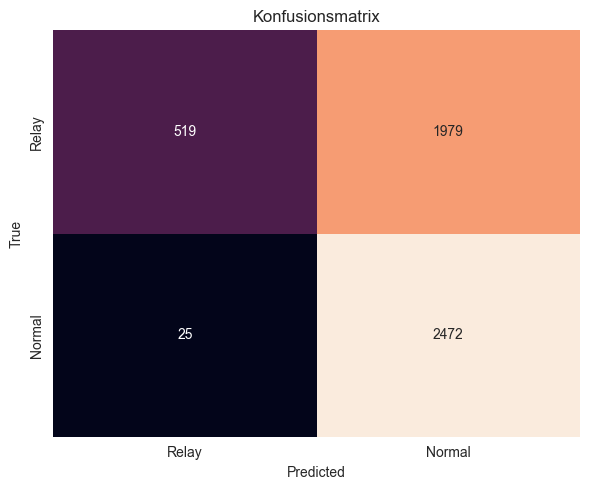

Epoch 1/250, Loss: 2850.84894990921
Epoch 2/250, Loss: 2850.8287044763565
Epoch 3/250, Loss: 2850.7735179662704
Epoch 4/250, Loss: 2850.8006393909454
Epoch 5/250, Loss: 2850.8497343063354
Epoch 6/250, Loss: 2850.8312125205994
Epoch 7/250, Loss: 2850.8148366212845
Epoch 8/250, Loss: 2851.3430474996567
Epoch 9/250, Loss: 2850.8889750242233
Epoch 10/250, Loss: 2850.782828807831
Epoch 11/250, Loss: 2850.807454586029
Epoch 12/250, Loss: 2850.9624050855637
Epoch 13/250, Loss: 2850.9646513462067
Epoch 14/250, Loss: 2851.427109003067
Epoch 15/250, Loss: 2851.0020847320557
Epoch 16/250, Loss: 2851.0800565481186
Epoch 17/250, Loss: 2850.845249772072
Epoch 18/250, Loss: 2850.945781111717
Epoch 19/250, Loss: 2850.950133919716
Epoch 20/250, Loss: 2851.3375866413116
Epoch 21/250, Loss: 2851.049854159355
Epoch 22/250, Loss: 2851.204604744911
Epoch 23/250, Loss: 2851.090819478035
Epoch 24/250, Loss: 2850.6605240106583
Epoch 25/250, Loss: 2850.828254342079
Epoch 26/250, Loss: 2851.147363781929
Epoch 27

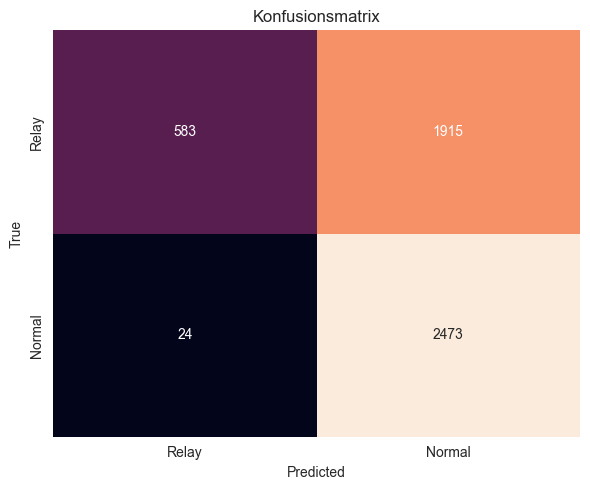

Epoch 1/250, Loss: 3168.4038084745407
Epoch 2/250, Loss: 3168.766783952713
Epoch 3/250, Loss: 3168.851135492325
Epoch 4/250, Loss: 3169.1779416799545
Epoch 5/250, Loss: 3168.9760777950287
Epoch 6/250, Loss: 3169.1185821294785
Epoch 7/250, Loss: 3169.0792092084885
Epoch 8/250, Loss: 3168.5871965885162
Epoch 9/250, Loss: 3168.7006731033325
Epoch 10/250, Loss: 3169.0730410814285
Epoch 11/250, Loss: 3168.861423611641
Epoch 12/250, Loss: 3169.6116201877594
Epoch 13/250, Loss: 3169.021539568901
Epoch 14/250, Loss: 3168.7193772792816
Epoch 15/250, Loss: 3168.991159439087
Epoch 16/250, Loss: 3169.1124321222305
Epoch 17/250, Loss: 3169.2397723197937
Epoch 18/250, Loss: 3168.831465244293
Epoch 19/250, Loss: 3168.8001865148544
Epoch 20/250, Loss: 3169.772032856941
Epoch 21/250, Loss: 3169.0322159528732
Epoch 22/250, Loss: 3168.527816414833
Epoch 23/250, Loss: 3168.8132387399673
Epoch 24/250, Loss: 3168.837186574936
Epoch 25/250, Loss: 3168.675140142441
Epoch 26/250, Loss: 3169.0372616052628
Epoch

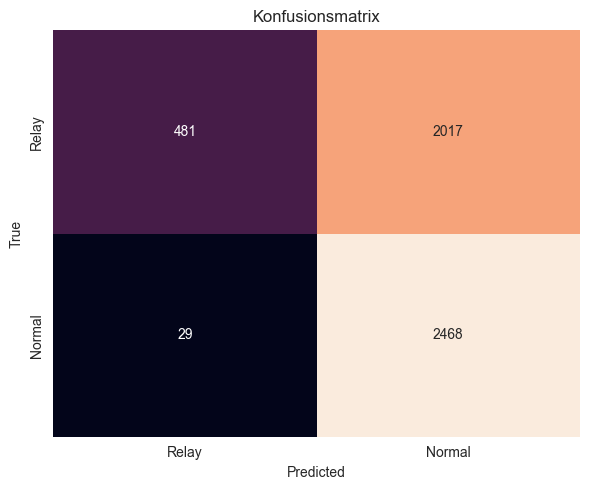

Epoch 1/250, Loss: 4990.434679031372
Epoch 2/250, Loss: 4991.258709907532
Epoch 3/250, Loss: 4990.868909835815
Epoch 4/250, Loss: 4992.527311086655
Epoch 5/250, Loss: 4990.617529630661
Epoch 6/250, Loss: 4991.510605812073
Epoch 7/250, Loss: 4990.899781942368
Epoch 8/250, Loss: 4991.424671888351
Epoch 9/250, Loss: 4991.289997816086
Epoch 10/250, Loss: 4991.720783233643
Epoch 11/250, Loss: 4990.822798967361
Epoch 12/250, Loss: 4990.696626901627
Epoch 13/250, Loss: 4990.618681669235
Epoch 14/250, Loss: 4990.636172056198
Epoch 15/250, Loss: 4991.181936502457
Epoch 16/250, Loss: 4990.826498031616
Epoch 17/250, Loss: 4991.049120664597
Epoch 18/250, Loss: 4991.799434900284
Epoch 19/250, Loss: 4991.914731502533
Epoch 20/250, Loss: 4990.960540294647
Epoch 21/250, Loss: 4992.353631973267
Epoch 22/250, Loss: 4990.627381801605
Epoch 23/250, Loss: 4991.341328859329
Epoch 24/250, Loss: 4990.45073223114
Epoch 25/250, Loss: 4992.478380441666
Epoch 26/250, Loss: 4990.656031847
Epoch 27/250, Loss: 4990.

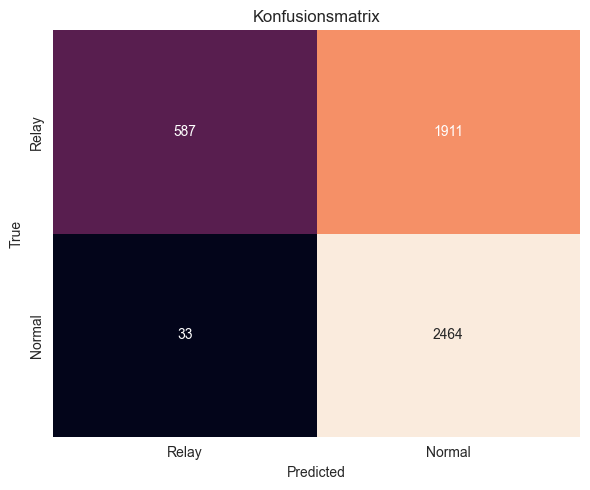

Epoch 1/250, Loss: 5276.661609172821
Epoch 2/250, Loss: 5275.99257850647
Epoch 3/250, Loss: 5277.027427196503
Epoch 4/250, Loss: 5276.959562063217
Epoch 5/250, Loss: 5275.995929479599
Epoch 6/250, Loss: 5276.0501873493195
Epoch 7/250, Loss: 5276.918206214905
Epoch 8/250, Loss: 5276.670189619064
Epoch 9/250, Loss: 5276.51206445694
Epoch 10/250, Loss: 5277.029079198837
Epoch 11/250, Loss: 5275.409031033516
Epoch 12/250, Loss: 5275.749990224838
Epoch 13/250, Loss: 5275.680006980896
Epoch 14/250, Loss: 5278.569956541061
Epoch 15/250, Loss: 5276.11710691452
Epoch 16/250, Loss: 5276.565157175064
Epoch 17/250, Loss: 5276.773952960968
Epoch 18/250, Loss: 5276.532181739807
Epoch 19/250, Loss: 5276.2688636779785
Epoch 20/250, Loss: 5276.298384666443
Epoch 21/250, Loss: 5276.140455961227
Epoch 22/250, Loss: 5276.492063522339
Epoch 23/250, Loss: 5276.349409818649
Epoch 24/250, Loss: 5276.377655982971
Epoch 25/250, Loss: 5276.338923931122
Epoch 26/250, Loss: 5276.1228539943695
Epoch 27/250, Loss: 5

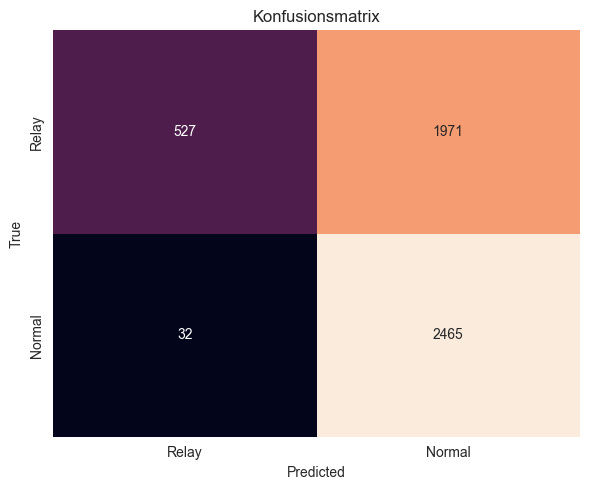

Epoch 1/250, Loss: 5704.378546476364
Epoch 2/250, Loss: 5703.847240924835
Epoch 3/250, Loss: 5704.644597768784
Epoch 4/250, Loss: 5704.3337116241455
Epoch 5/250, Loss: 5704.363349199295
Epoch 6/250, Loss: 5705.111718893051
Epoch 7/250, Loss: 5705.160428524017
Epoch 8/250, Loss: 5703.847577095032
Epoch 9/250, Loss: 5703.864618062973
Epoch 10/250, Loss: 5704.561194896698
Epoch 11/250, Loss: 5704.5904545784
Epoch 12/250, Loss: 5705.420475244522
Epoch 13/250, Loss: 5704.777633905411
Epoch 14/250, Loss: 5705.669588804245
Epoch 15/250, Loss: 5705.352232933044
Epoch 16/250, Loss: 5704.884410858154
Epoch 17/250, Loss: 5704.013440847397
Epoch 18/250, Loss: 5704.670446634293
Epoch 19/250, Loss: 5704.400332927704
Epoch 20/250, Loss: 5704.814262151718
Epoch 21/250, Loss: 5704.856926202774
Epoch 22/250, Loss: 5706.146717786789
Epoch 23/250, Loss: 5705.4008758068085
Epoch 24/250, Loss: 5704.861442565918
Epoch 25/250, Loss: 5704.698548078537
Epoch 26/250, Loss: 5704.582786798477
Epoch 27/250, Loss: 5

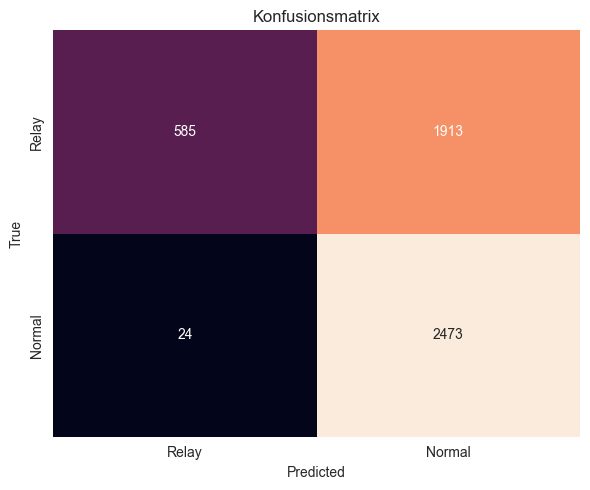

In [6]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.1, 0.2, 0.3}:
            clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=173, epochs=250)
            clf.fit(X_train_scaled_standard)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined_scaled_standard)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neuron {n}")
            print(f"dropout {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

Epoch 1/100, Loss: 1260.193980395794
Epoch 2/100, Loss: 1260.1732119321823
Epoch 3/100, Loss: 1260.0973159074783
Epoch 4/100, Loss: 1260.250220298767
Epoch 5/100, Loss: 1260.18279504776
Epoch 6/100, Loss: 1260.2278609275818
Epoch 7/100, Loss: 1260.1184949278831
Epoch 8/100, Loss: 1260.225381076336
Epoch 9/100, Loss: 1260.131019949913
Epoch 10/100, Loss: 1260.1069584488869
Epoch 11/100, Loss: 1260.2772554159164
Epoch 12/100, Loss: 1260.0885341763496
Epoch 13/100, Loss: 1260.2186101078987
Epoch 14/100, Loss: 1260.2570523619652
Epoch 15/100, Loss: 1260.2059676647186
Epoch 16/100, Loss: 1260.3388230800629
Epoch 17/100, Loss: 1260.3868539333344
Epoch 18/100, Loss: 1260.2183752059937
Epoch 19/100, Loss: 1260.3517116904259
Epoch 20/100, Loss: 1260.2018424272537
Epoch 21/100, Loss: 1260.2709548473358
Epoch 22/100, Loss: 1260.0476756095886
Epoch 23/100, Loss: 1260.1837342977524
Epoch 24/100, Loss: 1260.136767089367
Epoch 25/100, Loss: 1260.1922351121902
Epoch 26/100, Loss: 1260.1720208525658
Ep

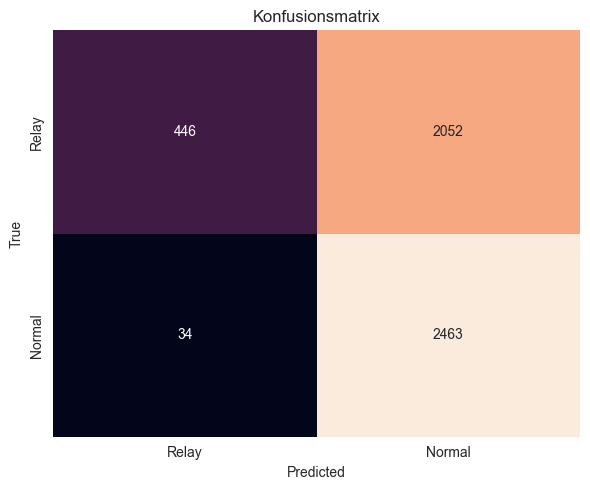

Epoch 1/100, Loss: 1541.747908294201
Epoch 2/100, Loss: 1541.9611783623695
Epoch 3/100, Loss: 1541.4122361540794
Epoch 4/100, Loss: 1541.7126114368439
Epoch 5/100, Loss: 1541.6531147956848
Epoch 6/100, Loss: 1541.6559106111526
Epoch 7/100, Loss: 1541.675556063652
Epoch 8/100, Loss: 1541.5082525014877
Epoch 9/100, Loss: 1541.7469440102577
Epoch 10/100, Loss: 1541.7257540225983
Epoch 11/100, Loss: 1541.6541199088097
Epoch 12/100, Loss: 1541.6492079496384
Epoch 13/100, Loss: 1541.7511709332466
Epoch 14/100, Loss: 1541.5988083481789
Epoch 15/100, Loss: 1541.6759687662125
Epoch 16/100, Loss: 1541.7219463586807
Epoch 17/100, Loss: 1541.6668955087662
Epoch 18/100, Loss: 1541.7705227732658
Epoch 19/100, Loss: 1541.829060792923
Epoch 20/100, Loss: 1541.814665198326
Epoch 21/100, Loss: 1541.6700226664543
Epoch 22/100, Loss: 1541.7132682800293
Epoch 23/100, Loss: 1541.6237283349037
Epoch 24/100, Loss: 1541.6502999663353
Epoch 25/100, Loss: 1541.6119931340218
Epoch 26/100, Loss: 1541.8536464571953

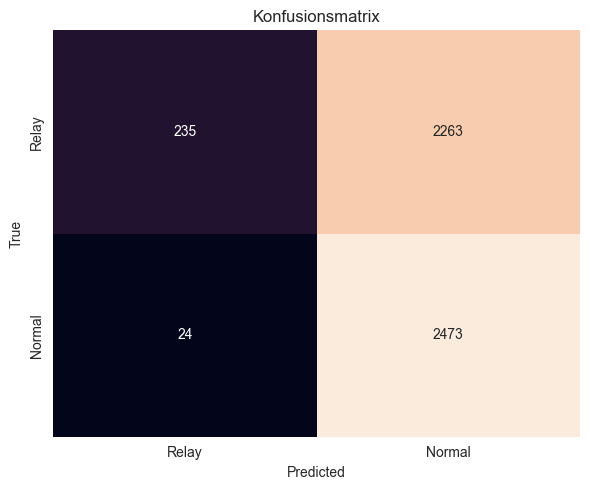

Epoch 1/100, Loss: 1556.8911609649658
Epoch 2/100, Loss: 1556.9009481668472
Epoch 3/100, Loss: 1556.8536033034325
Epoch 4/100, Loss: 1556.8540378212929
Epoch 5/100, Loss: 1556.7730948328972
Epoch 6/100, Loss: 1556.8515021800995
Epoch 7/100, Loss: 1556.6710472106934
Epoch 8/100, Loss: 1556.8456518054008
Epoch 9/100, Loss: 1556.6971489787102
Epoch 10/100, Loss: 1556.5986370444298
Epoch 11/100, Loss: 1556.7057679891586
Epoch 12/100, Loss: 1557.0420584082603
Epoch 13/100, Loss: 1556.8223735690117
Epoch 14/100, Loss: 1557.0919268131256
Epoch 15/100, Loss: 1556.7893494963646
Epoch 16/100, Loss: 1556.9110934138298
Epoch 17/100, Loss: 1557.1583641767502
Epoch 18/100, Loss: 1556.8224559426308
Epoch 19/100, Loss: 1556.7801461815834
Epoch 20/100, Loss: 1556.8669001460075
Epoch 21/100, Loss: 1556.809964478016
Epoch 22/100, Loss: 1557.1297136545181
Epoch 23/100, Loss: 1556.950492322445
Epoch 24/100, Loss: 1556.9342846870422
Epoch 25/100, Loss: 1556.982776105404
Epoch 26/100, Loss: 1556.628178536892

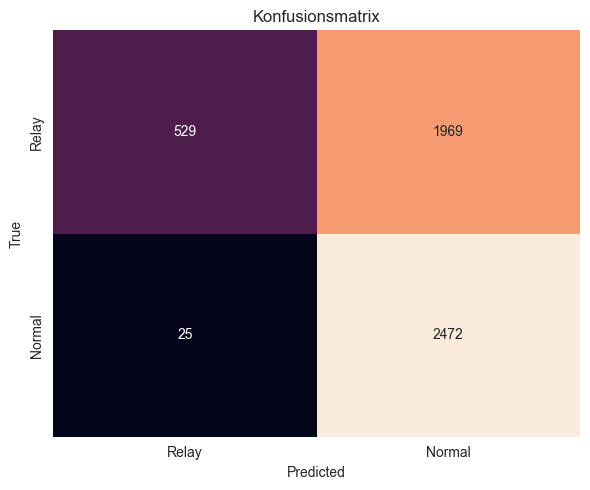

Epoch 1/100, Loss: 2332.1210862398148
Epoch 2/100, Loss: 2331.8345141410828
Epoch 3/100, Loss: 2331.972456097603
Epoch 4/100, Loss: 2332.033877849579
Epoch 5/100, Loss: 2331.925490796566
Epoch 6/100, Loss: 2331.8118230104446
Epoch 7/100, Loss: 2331.9286776185036
Epoch 8/100, Loss: 2331.765717089176
Epoch 9/100, Loss: 2331.8813145160675
Epoch 10/100, Loss: 2332.1789032816887
Epoch 11/100, Loss: 2332.409478664398
Epoch 12/100, Loss: 2332.0059233903885
Epoch 13/100, Loss: 2331.6228558421135
Epoch 14/100, Loss: 2331.9212605953217
Epoch 15/100, Loss: 2332.0486921072006
Epoch 16/100, Loss: 2331.8242527246475
Epoch 17/100, Loss: 2331.965189039707
Epoch 18/100, Loss: 2332.131522476673
Epoch 19/100, Loss: 2332.6926204562187
Epoch 20/100, Loss: 2331.712903738022
Epoch 21/100, Loss: 2331.86348092556
Epoch 22/100, Loss: 2332.117124259472
Epoch 23/100, Loss: 2331.6755933761597
Epoch 24/100, Loss: 2331.7723071575165
Epoch 25/100, Loss: 2331.904729604721
Epoch 26/100, Loss: 2332.044922709465
Epoch 27

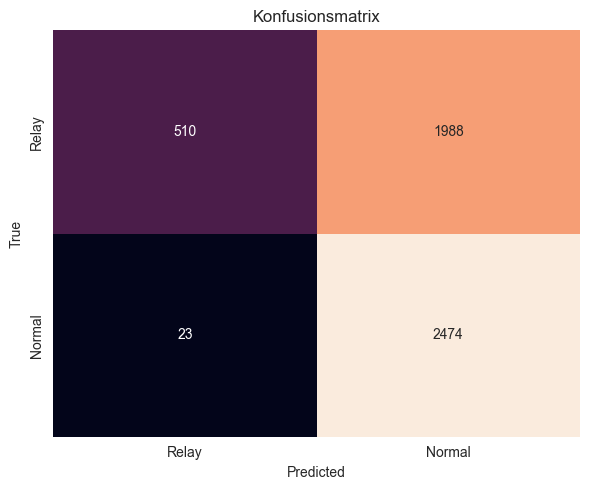

Epoch 1/100, Loss: 2225.6935037970543
Epoch 2/100, Loss: 2225.576628625393
Epoch 3/100, Loss: 2225.7502576112747
Epoch 4/100, Loss: 2225.492273569107
Epoch 5/100, Loss: 2225.518114924431
Epoch 6/100, Loss: 2225.5852161049843
Epoch 7/100, Loss: 2225.4708475470543
Epoch 8/100, Loss: 2225.886706650257
Epoch 9/100, Loss: 2225.5340625047684
Epoch 10/100, Loss: 2226.0542174577713
Epoch 11/100, Loss: 2225.7516827583313
Epoch 12/100, Loss: 2225.7897824645042
Epoch 13/100, Loss: 2225.69053542614
Epoch 14/100, Loss: 2225.7654631733894
Epoch 15/100, Loss: 2225.4306428432465
Epoch 16/100, Loss: 2225.4509803652763
Epoch 17/100, Loss: 2225.8054379820824
Epoch 18/100, Loss: 2225.516552090645
Epoch 19/100, Loss: 2225.577576816082
Epoch 20/100, Loss: 2225.6744158267975
Epoch 21/100, Loss: 2225.8538258075714
Epoch 22/100, Loss: 2225.4253081679344
Epoch 23/100, Loss: 2225.5202643871307
Epoch 24/100, Loss: 2225.662499189377
Epoch 25/100, Loss: 2225.945463180542
Epoch 26/100, Loss: 2225.6328273415565
Epoch

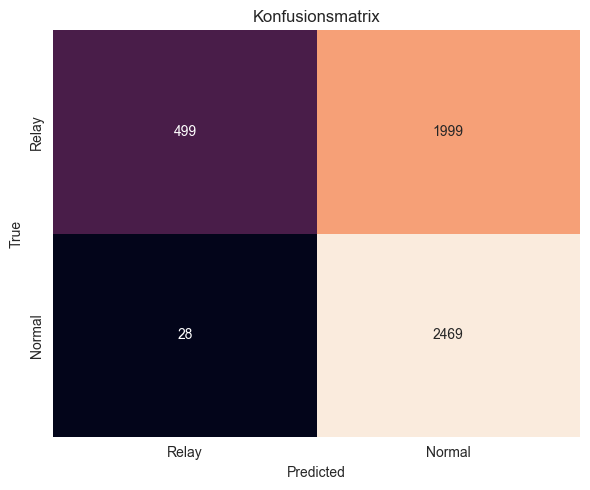

Epoch 1/100, Loss: 2256.51125895977
Epoch 2/100, Loss: 2256.4569849967957
Epoch 3/100, Loss: 2256.416174530983
Epoch 4/100, Loss: 2256.2661197185516
Epoch 5/100, Loss: 2256.4557547569275
Epoch 6/100, Loss: 2256.528354883194
Epoch 7/100, Loss: 2256.45893740654
Epoch 8/100, Loss: 2256.5179691314697
Epoch 9/100, Loss: 2257.0585090518
Epoch 10/100, Loss: 2256.473713874817
Epoch 11/100, Loss: 2256.415995121002
Epoch 12/100, Loss: 2256.3159699440002
Epoch 13/100, Loss: 2256.7085987329483
Epoch 14/100, Loss: 2256.5366412997246
Epoch 15/100, Loss: 2256.6479435563087
Epoch 16/100, Loss: 2256.389785885811
Epoch 17/100, Loss: 2256.672560095787
Epoch 18/100, Loss: 2256.737476706505
Epoch 19/100, Loss: 2256.6085624694824
Epoch 20/100, Loss: 2256.457930445671
Epoch 21/100, Loss: 2256.2374781370163
Epoch 22/100, Loss: 2256.545994281769
Epoch 23/100, Loss: 2256.5256510972977
Epoch 24/100, Loss: 2256.3628499507904
Epoch 25/100, Loss: 2256.4617770910263
Epoch 26/100, Loss: 2256.4834028482437
Epoch 27/10

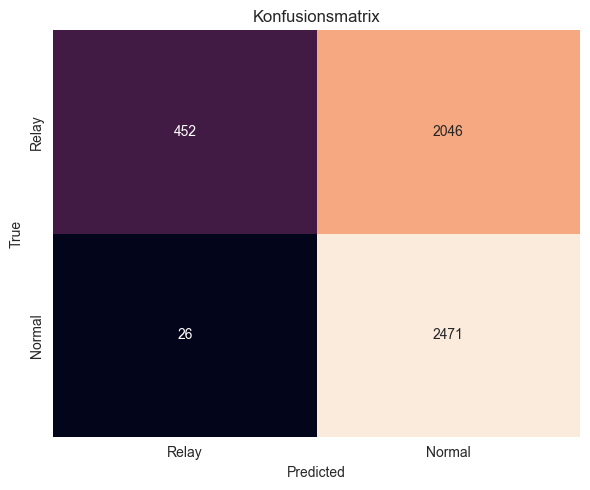

Epoch 1/100, Loss: 5787.184326887131
Epoch 2/100, Loss: 5787.88901424408
Epoch 3/100, Loss: 5787.154876947403
Epoch 4/100, Loss: 5787.533884048462
Epoch 5/100, Loss: 5787.617205619812
Epoch 6/100, Loss: 5787.284189939499
Epoch 7/100, Loss: 5787.244085788727
Epoch 8/100, Loss: 5787.958819389343
Epoch 9/100, Loss: 5788.075832366943
Epoch 10/100, Loss: 5787.861438035965
Epoch 11/100, Loss: 5787.206015348434
Epoch 12/100, Loss: 5787.016276597977
Epoch 13/100, Loss: 5787.276429891586
Epoch 14/100, Loss: 5787.467712163925
Epoch 15/100, Loss: 5788.337318181992
Epoch 16/100, Loss: 5788.042007684708
Epoch 17/100, Loss: 5787.523614168167
Epoch 18/100, Loss: 5788.1246066093445
Epoch 19/100, Loss: 5788.885928869247
Epoch 20/100, Loss: 5787.9068608284
Epoch 21/100, Loss: 5787.415481567383
Epoch 22/100, Loss: 5787.7724232673645
Epoch 23/100, Loss: 5788.381234884262
Epoch 24/100, Loss: 5787.257404327393
Epoch 25/100, Loss: 5787.394277334213
Epoch 26/100, Loss: 5787.682951450348
Epoch 27/100, Loss: 57

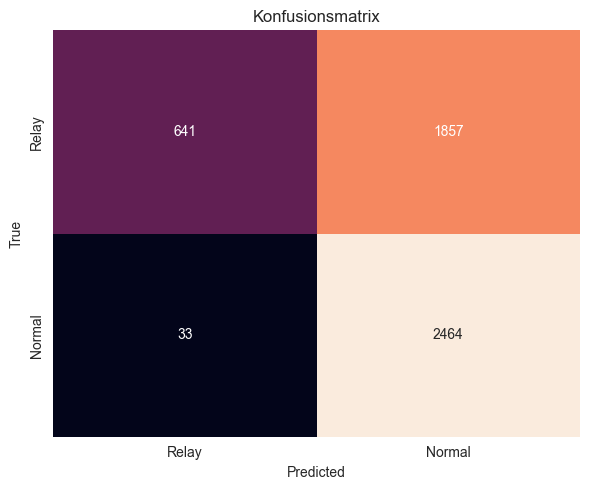

Epoch 1/100, Loss: 4874.742455244064
Epoch 2/100, Loss: 4874.8086931705475
Epoch 3/100, Loss: 4874.865910291672
Epoch 4/100, Loss: 4874.598879575729
Epoch 5/100, Loss: 4875.35956454277
Epoch 6/100, Loss: 4874.622979402542
Epoch 7/100, Loss: 4874.865364074707
Epoch 8/100, Loss: 4874.533552646637
Epoch 9/100, Loss: 4876.2634608745575
Epoch 10/100, Loss: 4874.921411752701
Epoch 11/100, Loss: 4875.222607374191
Epoch 12/100, Loss: 4875.923177719116
Epoch 13/100, Loss: 4874.707535028458
Epoch 14/100, Loss: 4875.241626024246
Epoch 15/100, Loss: 4875.4907212257385
Epoch 16/100, Loss: 4875.670067310333
Epoch 17/100, Loss: 4874.780710220337
Epoch 18/100, Loss: 4874.648212194443
Epoch 19/100, Loss: 4874.741572380066
Epoch 20/100, Loss: 4875.140672206879
Epoch 21/100, Loss: 4875.101420879364
Epoch 22/100, Loss: 4875.2234518527985
Epoch 23/100, Loss: 4876.601016759872
Epoch 24/100, Loss: 4874.878370285034
Epoch 25/100, Loss: 4875.872465133667
Epoch 26/100, Loss: 4876.602094173431
Epoch 27/100, Loss

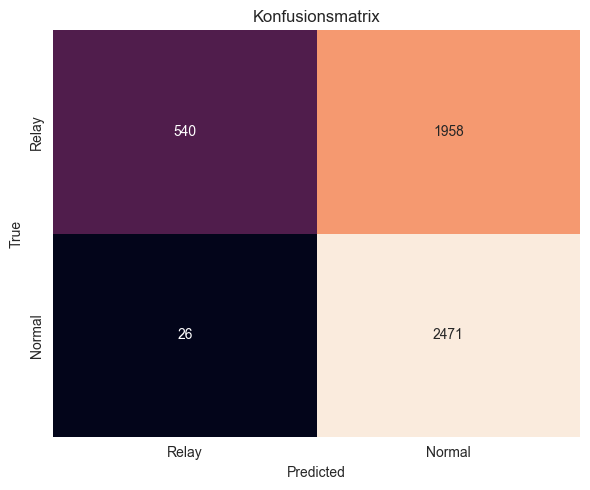

Epoch 1/100, Loss: 5241.771184682846
Epoch 2/100, Loss: 5241.958938121796
Epoch 3/100, Loss: 5241.461560964584
Epoch 4/100, Loss: 5241.775105476379
Epoch 5/100, Loss: 5241.050808429718
Epoch 6/100, Loss: 5241.396606683731
Epoch 7/100, Loss: 5241.954699277878
Epoch 8/100, Loss: 5241.36058473587
Epoch 9/100, Loss: 5240.866222381592
Epoch 10/100, Loss: 5241.932034492493
Epoch 11/100, Loss: 5241.678345918655
Epoch 12/100, Loss: 5241.820540428162
Epoch 13/100, Loss: 5241.019297838211
Epoch 14/100, Loss: 5241.3806319236755
Epoch 15/100, Loss: 5240.965204715729
Epoch 16/100, Loss: 5240.853971242905
Epoch 17/100, Loss: 5241.1120545864105
Epoch 18/100, Loss: 5241.31337428093
Epoch 19/100, Loss: 5241.263632774353
Epoch 20/100, Loss: 5241.618750095367
Epoch 21/100, Loss: 5241.205275297165
Epoch 22/100, Loss: 5242.013397455215
Epoch 23/100, Loss: 5241.065894126892
Epoch 24/100, Loss: 5241.8018963336945
Epoch 25/100, Loss: 5241.872822523117
Epoch 26/100, Loss: 5241.601988792419
Epoch 27/100, Loss: 

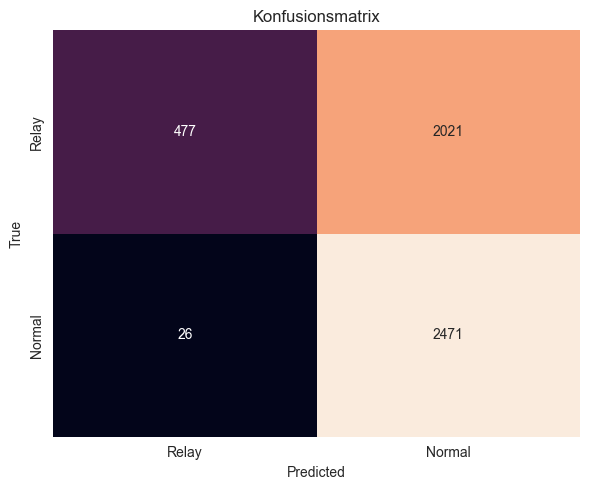

In [4]:
for n in {(64, 32), (128, 64), (256, 128)}:
    for d in {0.01, 0.1, 0.2}:
        clf = DeepSVDD(contamination=0.01, hidden_neurons=n, dropout_rate=d, n_features=173)
        clf.fit(X_train_scaled_minmax)

        # pyod.predict: 0 = inlier, 1 = outlier
        y_pred = clf.predict(X_test_combined_scaled_minmax)

        # cm und report
        cm = confusion_matrix(y_true, y_pred, labels=[1,0])
        print(f"hidden neuron {n}")
        print(f"dropout {d}")
        print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

        # plot
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt="d",
                    xticklabels=["Relay","Normal"],
                    yticklabels=["Relay","Normal"],
                    cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Konfusionsmatrix")
        plt.tight_layout()
        plt.show()